In [ ]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

In [104]:
# The starter code is short and simple, take a look!
from starter import *

import random

# Phase 1 - Create Inputs

In [105]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

In [106]:
# G = nx.empty_graph(N_SMALL)
# small(G)
# visualize(G)
# write_input(G, 'inputs/small.in')

# G = nx.empty_graph(N_MEDIUM)
# medium(G)
# visualize(G)
# write_input(G, 'inputs/medium.in')

# G = nx.empty_graph(N_LARGE)
# large(G)
# visualize(G)
# write_input(G, 'inputs/large.in')

# Phase 2 - Implement your Solver

In [107]:
from greedy_algorithm import *

In [161]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(6, 15)
    max_per_team = len(G.nodes) / k
    teams = [0 for _ in range(k)]
    for v in G.nodes:
        look_for_team = True
        while look_for_team:
            this_team = random.randint(1, k)
            if teams[this_team - 1] < max_per_team:
                G.nodes[v]['team'] = this_team
                teams[this_team - 1] += 1
                look_for_team = False

In [162]:
def current_solve(in_file):
    def current_solve_helper(G: nx.Graph):
        file_name = in_file[in_file.index("/") + 1:]
        file_name = file_name[:file_name.index("in")]
        instance = read_input(in_file)
        current_solution = read_output(instance, "outputs" + "/" + file_name + "out")
        for v in G.nodes:
            G.nodes[v]['team'] = current_solution.nodes[v]['team']
    return current_solve_helper

In [163]:
# Assign a team to v with G.nodes[v]['team'] = team_id
# Access the team of v with team_id = G.nodes[v]['team']

def solve(G: nx.Graph):
    
    # TODO: Try updating specific nodes, and seeing which changes to make based on homework 11 algorithm
    # TODO: Decrease the amount of nodes updated as time goes on
    # TODO: Do these steps for k-1, k, and k+1, pick the best

    k = optimize_k(G)
    G = max_k_cut_solve(k)(G)

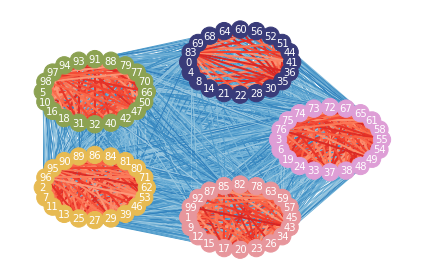

random_solve 368918.2493960704


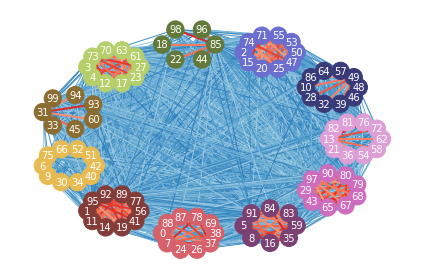

current_solve_helper 170051.74667115198


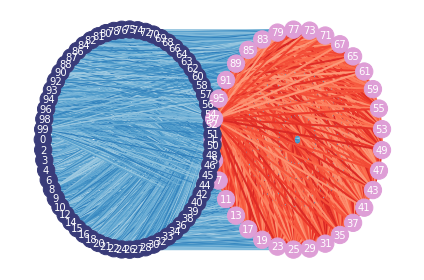

solve 20728768.826390393


In [164]:
input = 'inputs/small166.in'

solvers = [random_solve, current_solve(input), solve]

for solver in solvers:
    G = read_input(input)
    k = solver(G)
    validate_output(G)
    visualize(G)
    print(solver.__name__, score(G))

# G = read_input('self_inputs/medium.in')
# max_k_cut_solve(9)(G)
# visualize(G)
# print(score(G))


In [159]:
# run(max_k_cut_solve(2), 'self_inputs/small.in', 'self_outputs/small.out')

In [160]:
# TODO: record the best solutions by only saving if the score is only than the previous best for that file
for _ in range(20):
    run_all(random_solve, 'inputs', 'outputs')

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 74405.6900202268
inputs/small232.in: cost 59753.31591025766
inputs/large116.in: cost 211219.24939607034
inputs/large59.in: cost 202229.24939607034
inputs/small150.in: cost 230450.7738008533
inputs/large147.in: cost 511344.31591025763
inputs/small101.in: cost 1218254.8281828458
inputs/small197.in: cost 275241.0570147277
inputs/small206.in: cost 223250.30536840725
inputs/large240.in: cost 1730403.290006109
inputs/medium7.in: cost 690239.3159102576
inputs/small257.in: cost 1348150.8281828458
inputs/large180.in: cost 1547053.9056098931
inputs/large211.in: cost 1213112.9056098931
inputs/small135.in: cost 302172.5391960796
inputs/small68.in: cost 215659.24939607034
inputs/medium249.in: cost 73248.78632889136
inputs/large173.in: cost 64984.81500331443
inputs/small164.in: cost 260168.8702032813
inputs/medium218.in: cost 105219.24939607034
inputs/medium189.in: cost 252979.1689070338
inputs/small39.in: cost 84171.05701472767
inputs/large122.in: cost 479272.8281828459
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 245478.8281828459
inputs/small232.in: cost 91217.24939607034
inputs/large116.in: cost 171312.61214938603
inputs/large59.in: cost 121433.40862222019
inputs/small150.in: cost 198315.31591025766
inputs/large147.in: cost 1266624.9056098931
inputs/small101.in: cost 408330.1432152336
inputs/small197.in: cost 323764.0883757614
inputs/small206.in: cost 86435.36969444754
inputs/large240.in: cost 666686.8150033144
inputs/medium7.in: cost 1150121.5536923187
inputs/small257.in: cost 262460.31591025763
inputs/large180.in: cost 866491.6121493861
inputs/large211.in: cost 729954.6121493861
inputs/small135.in: cost 823578.3053684073
inputs/small68.in: cost 138177.36969444755
inputs/medium249.in: cost 165703.1689070338
inputs/large173.in: cost 91376.24939607034
inputs/small164.in: cost 250301.60817510195
inputs/medium218.in: cost 104019.24939607034
inputs/medium189.in: cost 92887.31591025766
inputs/small39.in: cost 56819.31591025766
inputs/large122.in: cost 347449.29000610905
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 66957.31591025766
inputs/small232.in: cost 57731.31591025766
inputs/large116.in: cost 118842.31591025766
inputs/large59.in: cost 202479.24939607034
inputs/small150.in: cost 210083.31591025766
inputs/large147.in: cost 1286003.9056098931
inputs/small101.in: cost 248258.31591025766
inputs/small197.in: cost 249730.66639451328
inputs/small206.in: cost 330489.8281828459
inputs/large240.in: cost 1292416.9056098931
inputs/medium7.in: cost 766281.25610169
inputs/small257.in: cost 1348107.8281828458
inputs/large180.in: cost 2980914.828182846
inputs/large211.in: cost 810355.6900202268
inputs/small135.in: cost 356188.0883757614
inputs/small68.in: cost 524408.828182846
inputs/medium249.in: cost 58104.31591025766
inputs/large173.in: cost 77949.31591025766
inputs/small164.in: cost 272007.8702032812
inputs/medium218.in: cost 87609.55369231876
inputs/medium189.in: cost 401673.8281828459
inputs/small39.in: cost 174783.30536840725
inputs/large122.in: cost 487272.8281828459
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 174124.29000610908
inputs/small232.in: cost 69210.20038610406
inputs/large116.in: cost 183219.24939607034
inputs/large59.in: cost 252479.90560989306
inputs/small150.in: cost 216662.31591025766
inputs/large147.in: cost 2533760.828182846
inputs/small101.in: cost 398336.7977605132
inputs/small197.in: cost 314352.28397252137
inputs/small206.in: cost 232444.30536840725
inputs/large240.in: cost 1308680.9056098931
inputs/medium7.in: cost 2380267.1689070337
inputs/small257.in: cost 661048.905609893
inputs/large180.in: cost 668805.3159102576
inputs/large211.in: cost 793956.6900202268
inputs/small135.in: cost 404647.1432152336
inputs/small68.in: cost 163694.79776051317
inputs/medium249.in: cost 83630.78632889136
inputs/large173.in: cost 258746.8281828459
inputs/small164.in: cost 292812.12506384565
inputs/medium218.in: cost 91409.55369231876
inputs/medium189.in: cost 249294.1689070338
inputs/small39.in: cost 247878.8281828459
inputs/large122.in: cost 160509.6900202268
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 130153.90560989306
inputs/small232.in: cost 78184.14321523352
inputs/large116.in: cost 150009.6900202268
inputs/large59.in: cost 115013.20710728243
inputs/small150.in: cost 232384.10420384802
inputs/large147.in: cost 2492847.828182846
inputs/small101.in: cost 276492.10420384805
inputs/small197.in: cost 312543.20038610406
inputs/small206.in: cost 326182.8281828459
inputs/large240.in: cost 1047742.2493960704
inputs/medium7.in: cost 663596.3159102576
inputs/small257.in: cost 523914.2493960704
inputs/large180.in: cost 853192.6121493861
inputs/large211.in: cost 578820.0464508269
inputs/small135.in: cost 834451.9399127858
inputs/small68.in: cost 108328.41896328294
inputs/medium249.in: cost 71221.74973050374
inputs/large173.in: cost 72267.81500331442
inputs/small164.in: cost 259562.5391960796
inputs/medium218.in: cost 71861.58600906636
inputs/medium189.in: cost 404008.8281828459
inputs/small39.in: cost 69842.5478183665
inputs/large122.in: cost 114503.1507392881
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 63495.31591025766
inputs/small232.in: cost 55072.31591025766
inputs/large116.in: cost 194219.24939607034
inputs/large59.in: cost 504532.8281828459
inputs/small150.in: cost 216253.10420384802
inputs/large147.in: cost 707691.6121493861
inputs/small101.in: cost 236374.31591025766
inputs/small197.in: cost 1167416.8281828458
inputs/small206.in: cost 214093.30536840725
inputs/large240.in: cost 527170.3159102576
inputs/medium7.in: cost 1200363.5536923187
inputs/small257.in: cost 262185.31591025763
inputs/large180.in: cost 2914216.828182846
inputs/large211.in: cost 1641584.290006109
inputs/small135.in: cost 820659.9399127858
inputs/small68.in: cost 373200.9399127858
inputs/medium249.in: cost 119095.24939607034
inputs/large173.in: cost 222761.8281828459
inputs/small164.in: cost 316300.5478183665
inputs/medium218.in: cost 74712.78632889136
inputs/medium189.in: cost 92368.31591025766
inputs/small39.in: cost 55517.31591025766
inputs/large122.in: cost 155009.6900202268
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 100158.6900202268
inputs/small232.in: cost 160981.30536840725
inputs/large116.in: cost 170009.6900202268
inputs/large59.in: cost 130620.81500331442
inputs/small150.in: cost 254495.5391960796
inputs/large147.in: cost 1640826.290006109
inputs/small101.in: cost 617841.905609893
inputs/small197.in: cost 384208.1432152336
inputs/small206.in: cost 72487.36969444754
inputs/large240.in: cost 1741689.290006109
inputs/medium7.in: cost 3585477.828182846
inputs/small257.in: cost 290248.7863675251
inputs/large180.in: cost 1051088.6900202269
inputs/large211.in: cost 607417.8150033144
inputs/small135.in: cost 402734.1432152336
inputs/small68.in: cost 126984.22862783638
inputs/medium249.in: cost 60030.256101689985
inputs/large173.in: cost 250318.8281828459
inputs/small164.in: cost 219508.31591025766
inputs/medium218.in: cost 88009.55369231876
inputs/medium189.in: cost 78592.31591025766
inputs/small39.in: cost 58497.57173183569
inputs/large122.in: cost 202219.24939607034
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 115045.90560989306
inputs/small232.in: cost 79731.14321523352
inputs/large116.in: cost 242739.90560989306
inputs/large59.in: cost 146702.61214938603
inputs/small150.in: cost 1018147.828182846
inputs/large147.in: cost 666363.6121493861
inputs/small101.in: cost 1233228.8281828458
inputs/small197.in: cost 223221.31591025766
inputs/small206.in: cost 83709.36969444754
inputs/large240.in: cost 1733210.290006109
inputs/medium7.in: cost 1408089.2493960704
inputs/small257.in: cost 890533.3053684073
inputs/large180.in: cost 1976757.290006109
inputs/large211.in: cost 519733.31591025763
inputs/small135.in: cost 404096.1432152336
inputs/small68.in: cost 530396.828182846
inputs/medium249.in: cost 269930.8281828459
inputs/large173.in: cost 107502.24939607034
inputs/small164.in: cost 361328.1432152336
inputs/medium218.in: cost 257272.8281828459
inputs/medium189.in: cost 126782.55369231876
inputs/small39.in: cost 69129.5478183665
inputs/large122.in: cost 129003.40862222019
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 72435.31591025766
inputs/small232.in: cost 79871.24939607034
inputs/large116.in: cost 510272.8281828459
inputs/large59.in: cost 252379.90560989306
inputs/small150.in: cost 284747.20038610406
inputs/large147.in: cost 1001129.2493960704
inputs/small101.in: cost 337990.12506384565
inputs/small197.in: cost 315392.0883757614
inputs/small206.in: cost 101167.79776051317
inputs/large240.in: cost 1302822.9056098931
inputs/medium7.in: cost 796757.25610169
inputs/small257.in: cost 890742.3053684073
inputs/large180.in: cost 3030984.828182846
inputs/large211.in: cost 648117.8150033144
inputs/small135.in: cost 351282.28397252137
inputs/small68.in: cost 368682.3053684072
inputs/medium249.in: cost 260578.8281828459
inputs/large173.in: cost 69112.61214938603
inputs/small164.in: cost 305412.12506384565
inputs/medium218.in: cost 143339.90560989306
inputs/medium189.in: cost 200655.90560989306
inputs/small39.in: cost 166207.30536840725
inputs/large122.in: cost 162509.63787784462
in

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 105255.6900202268
inputs/small232.in: cost 61624.057014727674
inputs/large116.in: cost 149312.61214938603
inputs/large59.in: cost 130620.81500331442
inputs/small150.in: cost 220172.10420384802
inputs/large147.in: cost 567389.0464508269
inputs/small101.in: cost 477828.2493960704
inputs/small197.in: cost 1147007.8281828458
inputs/small206.in: cost 116435.79776051317
inputs/large240.in: cost 591157.0232292542
inputs/medium7.in: cost 721247.3159102576
inputs/small257.in: cost 433248.7977605132
inputs/large180.in: cost 746745.8150033144
inputs/large211.in: cost 1695501.290006109
inputs/small135.in: cost 342318.12506384565
inputs/small68.in: cost 124719.18633179963
inputs/medium249.in: cost 247020.8281828459
inputs/large173.in: cost 60646.81500331443
inputs/small164.in: cost 352600.1432152336
inputs/medium218.in: cost 62604.10734021417
inputs/medium189.in: cost 168714.24939607034
inputs/small39.in: cost 128882.90560989306
inputs/large122.in: cost 343949.29000610905
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 249399.8281828459
inputs/small232.in: cost 63027.53919607959
inputs/large116.in: cost 106460.81500331442
inputs/large59.in: cost 169839.6900202268
inputs/small150.in: cost 251943.05701472767
inputs/large147.in: cost 979661.2493960704
inputs/small101.in: cost 484671.2493960704
inputs/small197.in: cost 282870.5391960796
inputs/small206.in: cost 77758.60817510197
inputs/large240.in: cost 2581813.828182846
inputs/medium7.in: cost 3520337.828182846
inputs/small257.in: cost 1348243.8281828458
inputs/large180.in: cost 674802.1507392881
inputs/large211.in: cost 553322.1507392881
inputs/small135.in: cost 483772.2493960704
inputs/small68.in: cost 119557.64505863519
inputs/medium249.in: cost 60869.74973050374
inputs/large173.in: cost 59777.81500331443
inputs/small164.in: cost 299242.28397252137
inputs/medium218.in: cost 89409.55369231876
inputs/medium189.in: cost 165846.24939607034
inputs/small39.in: cost 132999.90560989306
inputs/large122.in: cost 465272.8281828459
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 88989.6900202268
inputs/small232.in: cost 66926.78636752511
inputs/large116.in: cost 234219.24939607034
inputs/large59.in: cost 129700.81500331442
inputs/small150.in: cost 250095.8702032813
inputs/large147.in: cost 1671936.290006109
inputs/small101.in: cost 817946.3053684073
inputs/small197.in: cost 288713.8702032812
inputs/small206.in: cost 345897.8281828459
inputs/large240.in: cost 1712908.290006109
inputs/medium7.in: cost 847640.7497305038
inputs/small257.in: cost 433899.1432152336
inputs/large180.in: cost 1178438.2493960704
inputs/large211.in: cost 1629997.290006109
inputs/small135.in: cost 272435.7738008533
inputs/small68.in: cost 117235.31591025766
inputs/medium249.in: cost 85533.55369231876
inputs/large173.in: cost 98960.24939607034
inputs/small164.in: cost 242078.66639451328
inputs/medium218.in: cost 83609.55369231876
inputs/medium189.in: cost 371815.8281828459
inputs/small39.in: cost 59367.60817510197
inputs/large122.in: cost 489272.8281828459
inputs/m

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 76260.6900202268
inputs/small232.in: cost 62857.31591025766
inputs/large116.in: cost 135460.81500331443
inputs/large59.in: cost 169789.6900202268
inputs/small150.in: cost 499041.9056098931
inputs/large147.in: cost 1008908.2493960704
inputs/small101.in: cost 474459.2493960704
inputs/small197.in: cost 377423.7977605132
inputs/small206.in: cost 109291.79776051317
inputs/large240.in: cost 576586.1507392881
inputs/medium7.in: cost 3583643.828182846
inputs/small257.in: cost 262280.31591025763
inputs/large180.in: cost 764679.4086222202
inputs/large211.in: cost 823481.6378778446
inputs/small135.in: cost 830849.3053684073
inputs/small68.in: cost 251407.90560989306
inputs/medium249.in: cost 162467.1689070338
inputs/large173.in: cost 189136.29000610908
inputs/small164.in: cost 431027.2493960704
inputs/medium218.in: cost 65242.31591025766
inputs/medium189.in: cost 100017.20921347641
inputs/small39.in: cost 121272.90560989306
inputs/large122.in: cost 123342.31591025766
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 176838.29000610908
inputs/small232.in: cost 92130.24939607034
inputs/large116.in: cost 334449.29000610905
inputs/large59.in: cost 252459.90560989306
inputs/small150.in: cost 688112.3053684073
inputs/large147.in: cost 708743.6121493861
inputs/small101.in: cost 598851.905609893
inputs/small197.in: cost 221492.31591025766
inputs/small206.in: cost 163667.90560989306
inputs/large240.in: cost 1726247.290006109
inputs/medium7.in: cost 3626157.828182846
inputs/small257.in: cost 291342.608175102
inputs/large180.in: cost 977255.6378778446
inputs/large211.in: cost 2466102.828182846
inputs/small135.in: cost 486624.2493960704
inputs/small68.in: cost 123471.60817510197
inputs/medium249.in: cost 70660.78632889136
inputs/large173.in: cost 162166.29000610908
inputs/small164.in: cost 265602.0570147277
inputs/medium218.in: cost 110019.24939607034
inputs/medium189.in: cost 270082.1689070338
inputs/small39.in: cost 69183.05701472767
inputs/large122.in: cost 487272.8281828459
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 70946.81500331442
inputs/small232.in: cost 102434.24939607034
inputs/large116.in: cost 207219.24939607034
inputs/large59.in: cost 146922.61214938603
inputs/small150.in: cost 249721.5391960796
inputs/large147.in: cost 1276381.9056098931
inputs/small101.in: cost 244594.31591025766
inputs/small197.in: cost 1148841.8281828458
inputs/small206.in: cost 94525.36969444754
inputs/large240.in: cost 1726917.290006109
inputs/medium7.in: cost 2372942.1689070337
inputs/small257.in: cost 523985.2493960704
inputs/large180.in: cost 2978608.828182846
inputs/large211.in: cost 557813.0687101044
inputs/small135.in: cost 620012.905609893
inputs/small68.in: cost 268601.9056098931
inputs/medium249.in: cost 77763.80459507313
inputs/large173.in: cost 114521.24939607034
inputs/small164.in: cost 214292.31591025766
inputs/medium218.in: cost 71112.78632889136
inputs/medium189.in: cost 264157.1689070338
inputs/small39.in: cost 60705.53919607959
inputs/large122.in: cost 204719.24939607034
inp

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 64220.61214938603
inputs/small232.in: cost 96585.24939607034
inputs/large116.in: cost 163312.61214938603
inputs/large59.in: cost 144912.61214938603
inputs/small150.in: cost 321018.1432152336
inputs/large147.in: cost 643466.8150033144
inputs/small101.in: cost 617043.905609893
inputs/small197.in: cost 587041.905609893
inputs/small206.in: cost 177229.90560989306
inputs/large240.in: cost 1045108.2493960704
inputs/medium7.in: cost 914007.7497305038
inputs/small257.in: cost 433887.1432152336
inputs/large180.in: cost 882682.6121493861
inputs/large211.in: cost 2480355.828182846
inputs/small135.in: cost 1239246.8281828458
inputs/small68.in: cost 136366.05701472767
inputs/medium249.in: cost 163085.1689070338
inputs/large173.in: cost 276340.8281828459
inputs/small164.in: cost 727190.3053684073
inputs/medium218.in: cost 65403.804595073125
inputs/medium189.in: cost 254034.1689070338
inputs/small39.in: cost 71046.14321523352
inputs/large122.in: cost 142960.81500331443
inputs

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 70216.20710728243
inputs/small232.in: cost 129560.90560989306
inputs/large116.in: cost 179219.24939607034
inputs/large59.in: cost 334669.29000610905
inputs/small150.in: cost 689541.3053684073
inputs/large147.in: cost 497958.31591025763
inputs/small101.in: cost 500072.2493960704
inputs/small197.in: cost 242030.31591025766
inputs/small206.in: cost 120897.14321523352
inputs/large240.in: cost 853302.6900202268
inputs/medium7.in: cost 896772.2092134764
inputs/small257.in: cost 262404.31591025763
inputs/large180.in: cost 624683.3159102576
inputs/large211.in: cost 716948.6121493861
inputs/small135.in: cost 820047.3053684073
inputs/small68.in: cost 110293.31591025766
inputs/medium249.in: cost 82398.20921347641
inputs/large173.in: cost 72561.61214938603
inputs/small164.in: cost 212509.31591025766
inputs/medium218.in: cost 175649.1689070338
inputs/medium189.in: cost 91732.40967307265
inputs/small39.in: cost 59650.057014727674
inputs/large122.in: cost 249739.90560989306
i

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 101285.24939607034
inputs/small232.in: cost 77839.79776051317
inputs/large116.in: cost 175312.61214938603
inputs/large59.in: cost 145012.61214938603
inputs/small150.in: cost 249375.05701472767
inputs/large147.in: cost 611939.8150033144
inputs/small101.in: cost 480685.2493960704
inputs/small197.in: cost 311422.6539248577
inputs/small206.in: cost 99304.12506384567
inputs/large240.in: cost 736698.6121493861
inputs/medium7.in: cost 1371331.2493960704
inputs/small257.in: cost 660865.905609893
inputs/large180.in: cost 2948760.828182846
inputs/large211.in: cost 487201.31591025763
inputs/small135.in: cost 244960.31591025766
inputs/small68.in: cost 257571.90560989306
inputs/medium249.in: cost 249638.8281828459
inputs/large173.in: cost 61422.023229254184
inputs/small164.in: cost 543152.905609893
inputs/medium218.in: cost 65442.31591025766
inputs/medium189.in: cost 94171.31591025766
inputs/small39.in: cost 54871.31591025766
inputs/large122.in: cost 135503.1507392881
input

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 65660.81500331442
inputs/small232.in: cost 235733.8281828459
inputs/large116.in: cost 225739.90560989306
inputs/large59.in: cost 252509.90560989306
inputs/small150.in: cost 260733.05701472767
inputs/large147.in: cost 841874.6900202268
inputs/small101.in: cost 268308.9924928118
inputs/small197.in: cost 744160.3053684073
inputs/small206.in: cost 66552.31591025766
inputs/large240.in: cost 2595234.828182846
inputs/medium7.in: cost 2347485.1689070337
inputs/small257.in: cost 1347822.8281828458
inputs/large180.in: cost 3131204.828182846
inputs/large211.in: cost 708391.6121493861
inputs/small135.in: cost 398025.1432152336
inputs/small68.in: cost 144869.5478183665
inputs/medium249.in: cost 185819.1689070338
inputs/large173.in: cost 66615.31591025766
inputs/small164.in: cost 229467.31591025766
inputs/medium218.in: cost 67312.78632889136
inputs/medium189.in: cost 88198.31591025766
inputs/small39.in: cost 166895.30536840725
inputs/large122.in: cost 151312.61214938603
inpu

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 75370.6900202268
inputs/small232.in: cost 79435.14321523352
inputs/large116.in: cost 207219.24939607034
inputs/large59.in: cost 146902.61214938603
inputs/small150.in: cost 497180.9056098931
inputs/large147.in: cost 864849.6900202268
inputs/small101.in: cost 827105.3053684073
inputs/small197.in: cost 242222.46918416806
inputs/small206.in: cost 337208.8281828459
inputs/large240.in: cost 585480.4086222202
inputs/medium7.in: cost 849955.2092134764
inputs/small257.in: cost 262350.31591025763
inputs/large180.in: cost 817707.8150033144
inputs/large211.in: cost 1186502.9056098931
inputs/small135.in: cost 1250627.8281828458
inputs/small68.in: cost 212918.24939607034
inputs/medium249.in: cost 80660.78632889136
inputs/large173.in: cost 133027.90560989306
inputs/small164.in: cost 266422.36969444755
inputs/medium218.in: cost 104819.24939607034
inputs/medium189.in: cost 143271.24939607034
inputs/small39.in: cost 70388.0883757614
inputs/large122.in: cost 121342.31591025766
in

In [ ]:
tar('outputs', True)